In [11]:
import random
import os

import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [12]:
RANDOM_SEED = 2
TEST_SIZE = .8

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [13]:
def train_model(x, y):
    model = DecisionTreeClassifier(random_state=RANDOM_SEED)
    model.fit(x, y)

    return model

In [14]:
iris = datasets.load_iris()

x, y = iris['data'], iris['target']

train, test, y_train, y_test = train_test_split(x, y, random_state=RANDOM_SEED, test_size=TEST_SIZE)

model = train_model(train, y_train)

metrics = {'precision':  precision_score(y_true=y_test, y_pred=model.predict(test), average='weighted')}

metrics

{'precision': 0.9274718397997498}

Логируем гиперпараметры в название модели

In [15]:
os.makedirs('models', exist_ok=True)

with open(f'./models/model_{RANDOM_SEED}_{TEST_SIZE}.pkl', 'wb') as f:
    pickle.dump(model, f)

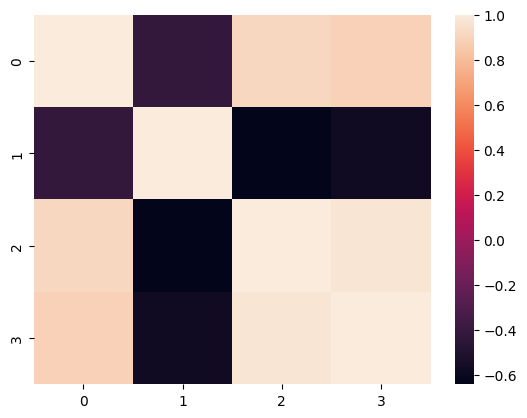

In [16]:
sns.heatmap(pd.DataFrame(train).corr())
plt.show()

{'precision': 0.9166666666666666}

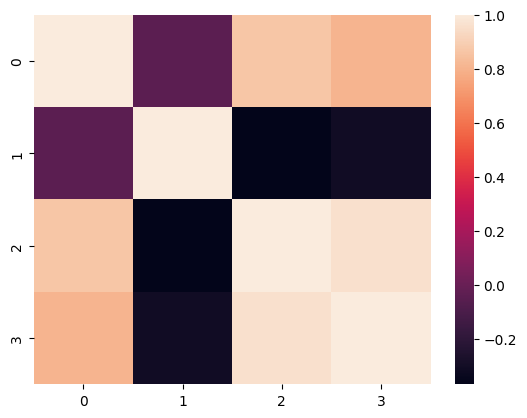

In [17]:
sns.heatmap(pd.DataFrame(test).corr())
test_metrics = {'precision': precision_score(y_true=y_test, y_pred=model.predict(test), average='micro')}

test_metrics